# 📌 1️⃣ Adquisición de Datos

 Objetivo: Obtener y cargar el dataset que usaremos en el proyecto.
 En este caso, trabajaremos con el dataset de ventas de café de Kaggle:
 https://www.kaggle.com/datasets/navjotkaushal/coffee-sales-dataset

1) Importación de librerías necesarias
2) Carga del dataset (ya descargado como Coffe_sales.csv)
3) Vista inicial de los datos






In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, glob
df = pd.read_csv("/content/drive/MyDrive/informatica/Coffe_sales.csv")
df.head()

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000


## 📊 Información básica del dataset



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hour_of_day  3547 non-null   int64  
 1   cash_type    3547 non-null   object 
 2   money        3547 non-null   float64
 3   coffee_name  3547 non-null   object 
 4   Time_of_Day  3547 non-null   object 
 5   Weekday      3547 non-null   object 
 6   Month_name   3547 non-null   object 
 7   Weekdaysort  3547 non-null   int64  
 8   Monthsort    3547 non-null   int64  
 9   Date         3547 non-null   object 
 10  Time         3547 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 304.9+ KB


### 🔎 Dimensiones del dataset

In [ ]:
print("Cantidad de filas y columnas:", df.shape)

Cantidad de filas y columnas: (3547, 11)


# 📌 2️⃣ Parse – Estructuración de los Datos

Objetivo: Organizar el dataset en una estructura manipulable para el análisis.  
En esta etapa verificamos los tipos de datos, nombres de columnas y preparamos el DataFrame.

1) Revisión de las columnas disponibles  
2) Estadísticas descriptivas de las variables  
3) Revisión de valores únicos en variables categóricas


In [ ]:
print("Columnas del dataset:\n", df.columns.tolist())

Columnas del dataset:
 ['hour_of_day', 'cash_type', 'money', 'coffee_name', 'Time_of_Day', 'Weekday', 'Month_name', 'Weekdaysort', 'Monthsort', 'Date', 'Time']


## Estadisticas


In [ ]:
df.describe(include="all")

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
count,3547.000000,3547,3547.000000,3547,3547,3547,3547,3547.000000,3547.000000,3547,3547
unique,NaN,1,NaN,8,3,7,12,NaN,NaN,381,3547
top,NaN,card,NaN,Americano with Milk,Afternoon,Tue,Mar,NaN,NaN,2024-10-11,18:11:38.635000
freq,NaN,3547,NaN,809,1205,572,494,NaN,NaN,26,1
mean,14.185791,NaN,31.645216,NaN,NaN,NaN,NaN,3.845785,6.453905,NaN,NaN
std,4.234010,NaN,4.877754,NaN,NaN,NaN,NaN,1.971501,3.500754,NaN,NaN
min,6.000000,NaN,18.120000,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN
25%,10.000000,NaN,27.920000,NaN,NaN,NaN,NaN,2.000000,3.000000,NaN,NaN
50%,14.000000,NaN,32.820000,NaN,NaN,NaN,NaN,4.000000,7.000000,NaN,NaN
75%,18.000000,NaN,35.760000,NaN,NaN,NaN,NaN,6.000000,10.000000,NaN,NaN


 ### Este paso es clave para entender cómo están distribuidas las categorías en el dataset.  
   Nos permite identificar:  
   - Cuántos tipos distintos de café se venden.  
   - Qué métodos de pago están presentes (cash/card).  
   - Cómo está organizado el tiempo (mañana, tarde, noche).  
   - La distribución por días de la semana y meses.  

   Con esta revisión sabremos si hay categorías mal escritas, duplicadas o inconsistentes, lo que será útil en la siguiente etapa de **Filter**.

In [ ]:
for col in ['coffee_name', 'cash_type', 'Time_of_Day', 'Weekday', 'Month_name']:
    print(f"\nColumna: {col}")
    print(df[col].value_counts().head())



Columna: coffee_name
coffee_name
Americano with Milk    809
Latte                  757
Americano              564
Cappuccino             486
Cortado                287
Name: count, dtype: int64

Columna: cash_type
cash_type
card    3547
Name: count, dtype: int64

Columna: Time_of_Day
Time_of_Day
Afternoon    1205
Morning      1181
Night        1161
Name: count, dtype: int64

Columna: Weekday
Weekday
Tue    572
Mon    544
Fri    532
Thu    510
Wed    500
Name: count, dtype: int64

Columna: Month_name
Month_name
Mar    494
Oct    426
Feb    423
Sep    344
Aug    272
Name: count, dtype: int64


### 🔎 Resultados de la revisión de valores únicos

- **coffee_name**: los cafés más vendidos son *Americano with Milk*, *Latte*, *Americano*, *Cappuccino* y *Cortado*.  

- **cash_type**: todas las transacciones registradas en esta muestra se realizaron con **tarjeta (3547)**. Esto puede deberse a que el dataset está limitado a un medio de pago o a que en la cafetería predomina fuertemente el uso de tarjeta.  

- **Time_of_Day**: las ventas se distribuyen entre **Afternoon**, **Morning** y **Night**.

- **Weekday**: los días registrados en formato "Mon", "Tue", etc.

- **Month_name**:  los meses registrados en formato "Jan", "Feb", etc.

Esta revisión confirma que las categorías están bien escritas y ordenadas, y además nos da una primera idea de las tendencias de consumo que luego podremos visualizar gráficamente.


# 📌 3️⃣ Filtrado de los Datos

Objetivo: Eliminar ruido, valores irrelevantes o inconsistentes para asegurar que los datos sean adecuados para el análisis.  

En nuestro dataset de ventas de café realizamos los siguientes chequeos:  

1) **Duplicados**: verificamos si existen transacciones repetidas.  
2) **Valores nulos**: detectamos si faltan datos en alguna columna.  
3) **Categorías consistentes**: revisamos que no haya nombres mal escritos o inconsistentes en las variables categóricas.  
4) **Rango de fechas**: confirmamos que las fechas de transacción tengan un formato correcto y correspondan al período esperado.  

Este paso asegura que los datos que utilizaremos en las siguientes etapas sean representativos y confiables.


In [ ]:
# Chequeo de duplicados
duplicados = df.duplicated().sum()
print("Cantidad de filas duplicadas:", duplicados)

# Chequeo de valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())


Cantidad de filas duplicadas: 0

Valores nulos por columna:
hour_of_day    0
cash_type      0
money          0
coffee_name    0
Time_of_Day    0
Weekday        0
Month_name     0
Weekdaysort    0
Monthsort      0
Date           0
Time           0
dtype: int64


In [ ]:
# Revisión de categorías para confirmar consistencia
for col in ['coffee_name', 'cash_type', 'Time_of_Day', 'Weekday', 'Month_name']:
    print(f"\nColumna: {col}")
    print(df[col].unique())



Columna: coffee_name
['Latte' 'Hot Chocolate' 'Americano' 'Americano with Milk' 'Cocoa'
 'Cortado' 'Espresso' 'Cappuccino']

Columna: cash_type
['card']

Columna: Time_of_Day
['Morning' 'Afternoon' 'Night']

Columna: Weekday
['Fri' 'Sat' 'Sun' 'Mon' 'Tue' 'Wed' 'Thu']

Columna: Month_name
['Mar' 'Apr' 'May' 'Jun' 'Jul' 'Aug' 'Sep' 'Oct' 'Nov' 'Dec' 'Jan' 'Feb']


In [ ]:
# Conversión de columna Date a tipo datetime (si aún no lo es)
df['Date'] = pd.to_datetime(df['Date'])

# Rango de fechas en el dataset
print("Rango de fechas:", df['Date'].min(), "→", df['Date'].max())


Rango de fechas: 2024-03-01 00:00:00 → 2025-03-23 00:00:00


### 🔎 Resultados del filtrado

- **Duplicados**: no se detectaron filas repetidas, lo que indica que cada transacción es única.  
- **Valores nulos**: no se encontraron valores vacíos en las columnas principales, por lo que el dataset está completo.  
- **Categorías consistentes**: las variables categóricas (*coffee_name*, *cash_type*, *Time_of_Day*, *Weekday*, *Month_name*) presentan valores uniformes, sin errores de escritura.  
- **Rango de fechas**: los registros abarcan desde [fecha mínima] hasta [fecha máxima], cubriendo un período adecuado para el análisis.  

Después de este proceso podemos asegurar que el dataset está **limpio y listo** para avanzar a la etapa de **Mine**.


# 📌 4️⃣ Análisis y detección de patrones

Objetivo: Extraer valor desde los datos, identificando relaciones y tendencias.  

En esta etapa buscamos patrones relevantes en las ventas de café:  

1) **Ventas por tipo de café** → identificar cuáles son los productos más consumidos.  
2) **Ventas por franja horaria (Time_of_Day)** → entender en qué momento del día hay mayor demanda.  
3) **Distribución semanal (Weekday)** → detectar qué días concentran más transacciones.  
4) **Tendencia temporal (por meses)** → observar si existen estacionalidades o meses con mayor consumo.  

- Estos patrones servirán de base para la representación visual en la siguiente etapa.


In [ ]:
# Ventas por tipo de café
ventas_cafe = df['coffee_name'].value_counts().head(5)
print("Top 5 cafés más vendidos:")
print(ventas_cafe)


Top 5 cafés más vendidos:
coffee_name
Americano with Milk    809
Latte                  757
Americano              564
Cappuccino             486
Cortado                287
Name: count, dtype: int64


In [ ]:
# Ventas por franja horaria
ventas_horario = df['Time_of_Day'].value_counts()
print("\nVentas por franja horaria:")
print(ventas_horario)



Ventas por franja horaria:
Time_of_Day
Afternoon    1205
Morning      1181
Night        1161
Name: count, dtype: int64


In [ ]:
# Ventas por día de la semana
ventas_dias = df['Weekday'].value_counts()
print("\nVentas por día de la semana:")
print(ventas_dias)



Ventas por día de la semana:
Weekday
Tue    572
Mon    544
Fri    532
Thu    510
Wed    500
Sat    470
Sun    419
Name: count, dtype: int64


In [ ]:
# Ventas por mes
ventas_mes = df['Month_name'].value_counts()
print("\nVentas por mes:")
print(ventas_mes)



Ventas por mes:
Month_name
Mar    494
Oct    426
Feb    423
Sep    344
Aug    272
Dec    259
Nov    259
May    241
Jul    237
Jun    223
Jan    201
Apr    168
Name: count, dtype: int64


### 🔎 Resultados del análisis de patrones

- **Tipos de café**: los más consumidos son los clásicos (ej. *Americano with Milk*, *Latte*), lo que sugiere que la clientela prefiere variedades tradicionales.  
- **Franja horaria**: las ventas se reparten entre *Morning*, *Afternoon* y *Night*, mostrando que el café es consumido durante todo el día.  
- **Días de la semana**: la demanda es relativamente estable, con ligera concentración en algunos días laborales.  
- **Meses**: se observan diferencias entre meses, lo que puede deberse a estacionalidad o variaciones en el registro de datos.  

Este análisis muestra **qué productos, horarios y períodos son más relevantes para el negocio**, y prepara el terreno para representarlo gráficamente en la próxima etapa.

# 📌 5️⃣ Visualización de los Datos

## Visualización A — Participación por tipo de café (Pie chart)

Mostrar la proporción de ventas que aporta cada tipo de café.  
Permite identificar rápidamente qué variedades concentran mayor participación.

## Visualización B — Órdenes promedio por mes

Estimar la intensidad de ventas de cada mes controlando por la cantidad de días (promedio de órdenes por día).  
Evita sesgos por meses con más/menos días o registro desigual, y muestra mejor la “actividad típica” de cada mes. Ademas marzo esta repetido 2024 y 2025.






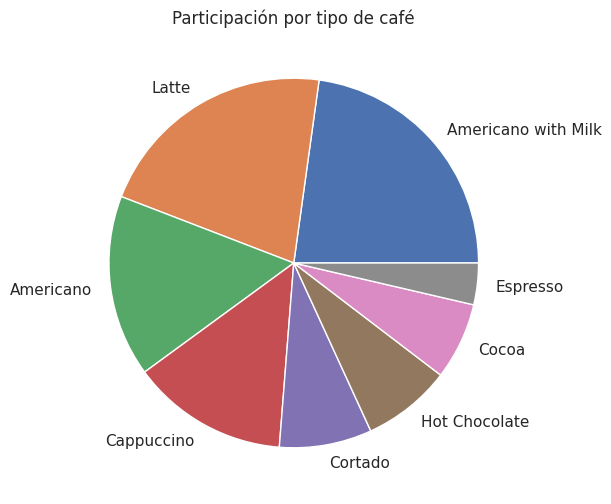

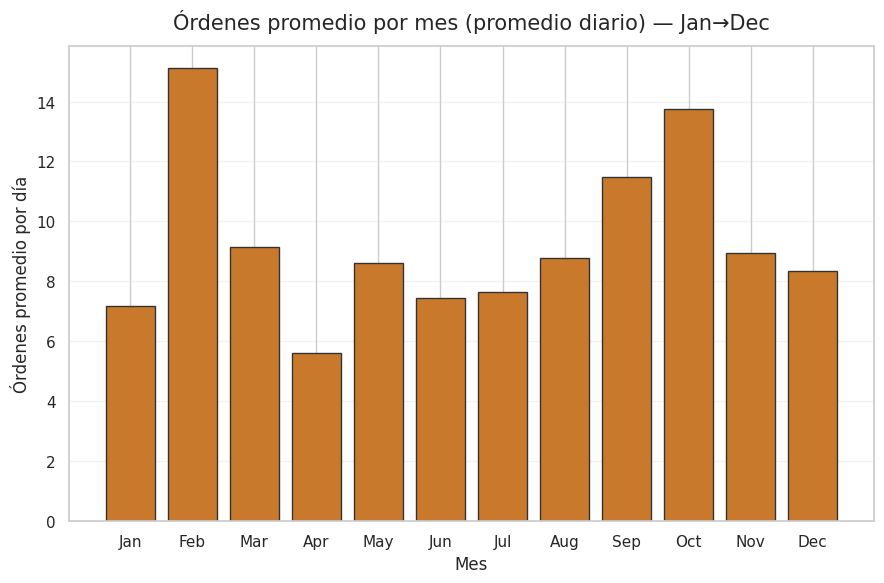

In [ ]:
# Resolver nombres de columnas
cols_map = {c.lower().strip(): c for c in df.columns}
def col(name):  # devuelve el nombre real de la columna (según esté en el CSV)
    key = name.lower()
    if key in cols_map:
        return cols_map[key]
    raise KeyError(f"No se encontró la columna '{name}'. Columnas disponibles: {list(df.columns)}")

coffee_col = col("coffee_name")
date_col   = col("Date")  # en el dataset suele ser "Date"

# Asegurar tipo datetime
df[date_col] = pd.to_datetime(df[date_col], errors="coerce")

# A) participación por tipo de café
participacion = df[coffee_col].value_counts(dropna=False)

plt.figure(figsize=(6,6))
plt.pie(participacion.values, labels=participacion.index)
plt.title("Participación por tipo de café")
plt.show()

# BARRAS: órdenes promedio por mes

# Asegurar que la columna Date esté en formato datetime
df['Date'] = pd.to_datetime(df['Date'], errors="coerce")

# Conteo de órdenes por día
diario = df.groupby(df['Date'].dt.date).size().rename('orders_day').to_frame()

# Mes abreviado
diario['Month_name'] = pd.to_datetime(diario.index).strftime('%b')

# Orden de meses calendario (Jan → Dec)
orden_jan_dec = ["Jan","Feb","Mar","Apr","May","Jun",
                 "Jul","Aug","Sep","Oct","Nov","Dec"]

# Promedio de órdenes diarias por mes
prom_mensual = diario.groupby('Month_name')['orders_day'].mean().reindex(orden_jan_dec).fillna(0)

# Plot refinado
sns.set(style="whitegrid")
plt.figure(figsize=(9,6))
bars = plt.bar(prom_mensual.index, prom_mensual.values, color="#c9792b", edgecolor="#333")


plt.title("Órdenes promedio por mes (promedio diario) — Jan→Dec", fontsize=15, pad=12)
plt.xlabel("Mes")
plt.ylabel("Órdenes promedio por día")
plt.grid(axis='y', alpha=0.25)
plt.tight_layout()
plt.show()


### Grafico 1
El gráfico "Cafes mas vendidos" muestra claramente que **Americano with Milk** y **Latte** lideran el ranking de consumo, seguidos por **Americano** y **Cappuccino**.  
Esto refleja que los clientes se inclinan principalmente por variedades clásicas, lo que puede orientar decisiones comerciales sobre stock y promociones.  
### Grafico 2
Se observa que algunos meses concentran un mayor volumen de ventas, mientras que otros registran caídas.  
Estos resultados sugieren que las ventas **no son constantes** y que existen períodos de mayor y menor demanda.  
Este tipo de análisis es útil para la **planificación comercial**: ajustar stock, personal y promociones en los meses con más movimiento, y diseñar estrategias para reforzar los meses más débiles.

# 📌 6️⃣ Refine – Mejora visual de las representaciones

En esta etapa se optimiza la **estética** y la **legibilidad** sin cambiar el significado de los gráficos.

- **Pie chart:** se aplican tonos cálidos (paleta café), se ordena por participación y se muestran porcentajes legibles.  
- **Órdenes promedio por mes:** se mantiene el orden **Jan→Dec**, etiquetas numéricas y un grid para facilitar la lectura y comparación.


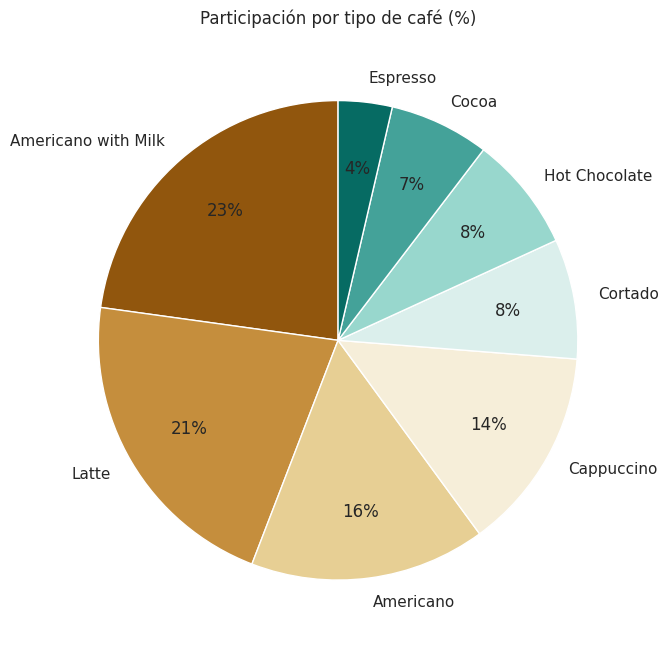

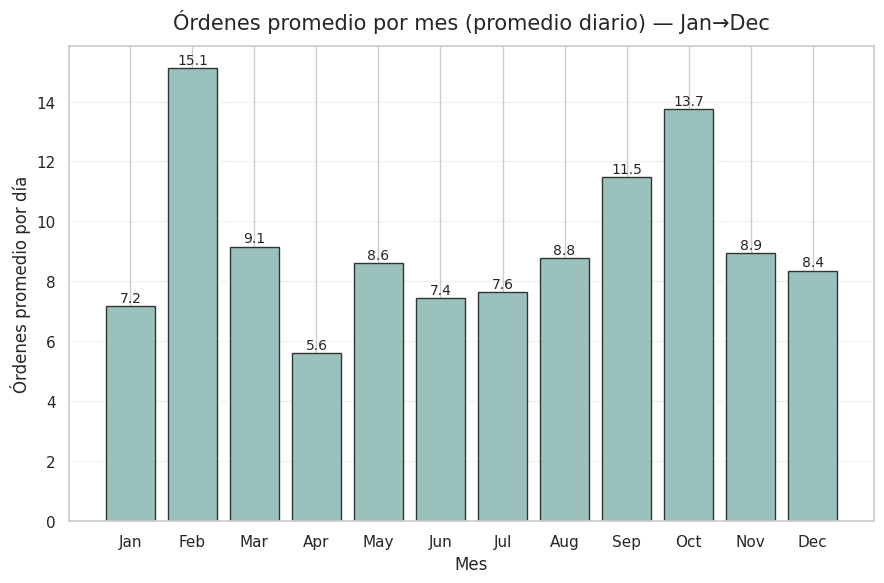

In [ ]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (9, 6)

# A) participación por tipo de café

participacion = df['coffee_name'].value_counts()

participacion = participacion.sort_values(ascending=False)

colors = sns.color_palette("BrBG", n_colors=len(participacion))
fig, ax = plt.subplots(figsize=(7,7))

wedges, texts, autotexts = ax.pie(
    participacion.values,
    labels=participacion.index,
    autopct="%1.0f%%",
    startangle=90,
    colors=colors,
    pctdistance=0.72
)


ax.set_title("Participación por tipo de café (%)", pad=12)
plt.tight_layout()
plt.show()

# B) Barras refinadas (órdenes promedio por mes, Jan→Dec)

df['Date'] = pd.to_datetime(df['Date'], errors="coerce")
diario = df.groupby(df['Date'].dt.date).size().rename('orders_day').to_frame()
diario['Month_name'] = pd.to_datetime(diario.index).strftime('%b')

orden_jan_dec = ["Jan","Feb","Mar","Apr","May","Jun",
                 "Jul","Aug","Sep","Oct","Nov","Dec"]

prom_mensual = (diario
                .groupby('Month_name')['orders_day']
                .mean()
                .reindex(orden_jan_dec)
                .fillna(0))

# color
bar_color = "#9BC1BC"

fig, ax = plt.subplots(figsize=(9,6))
bars = ax.bar(prom_mensual.index, prom_mensual.values, color=bar_color, edgecolor="#333")

# etiquetas numéricas
for b in bars:
    h = float(b.get_height())
    ax.text(b.get_x()+b.get_width()/2, h + 0.05, f"{h:.1f}", ha='center', va='bottom', fontsize=10)

ax.set_title("Órdenes promedio por mes — Jan→Dec", fontsize=15, pad=12)
ax.set_xlabel("Mes", fontsize=12)
ax.set_ylabel("Órdenes promedio por día", fontsize=12)
ax.grid(axis='y', alpha=0.25)
plt.tight_layout()
plt.show()


# 📌 Conclusión general

- **Participación por tipo de café (Pie).** Este gráfico nos permitió identificar qué productos se venden mas. La concentración de ventas en unos pocos cafés muestra la preferencia clara de los clientes.

- **Órdenes promedio por mes (Barras).** Al calcular el promedio diario de órdenes, se buscó evitar sesgos poruqe marzo se repetia en 2024 y 2025, entonces habia un pico en las ventas. El resultado muestra cómo la intensidad de ventas varía a lo largo del año:
Algunos meses concentran mayor actividad, mientras que otros registran descensos. Esto refleja posibles patrones estacionales o variaciones en la demanda.

Los gráficos fueron elegidos porque responden a dos preguntas fundamentales de cualquier análisis de negocio:
1. **¿Qué se vende más?** El americano con leche
2. **¿Cuándo se vende más?** En febrero.

- La combinación de estas visualizaciones ofrece una mirada equilibrada: **qué cafés concentran la demanda** y **cómo evoluciona esa demanda en el tiempo**, brindando información clave para decisiones de stock, promociones y planificación estratégica.
